In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import numpy as np

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

import networkx as nx

from minimal.imaging import blit_rooms
from minimal.layout import LayoutGraph, NodeType
from minimal.gen import generate_plan, PlanMasks
from minimal import sample_graphs
from minimal.rooms import RoomAreas, extract_rooms, create_orientation_mask
from minimal.walls import find_walls, intersect_rooms, join_wall_corners, _conv_mask

%matplotlib inline

In [3]:
cmapr = ListedColormap(['white', *plt.get_cmap('tab10').colors])
cmapw = ListedColormap(['white', 'black', *plt.get_cmap('tab10').colors])

In [22]:
%%time
pm = PlanMasks.create_from_state(torch.load("data/plan_masks_01.pth"))
rooms = extract_rooms(pm)

CPU times: user 1.33 s, sys: 0 ns, total: 1.33 s
Wall time: 1.33 s


In [29]:
rect_mask = sum(room.to_mask() * (i + 1) for i, room in enumerate(rooms))

In [30]:
walls_mask, orient_mask, inner_mask = intersect_rooms(rooms)

In [31]:
walls_mask, corners = join_wall_corners(walls_mask, inner_mask)

In [39]:
# plt.figure(figsize=(15,5))

# plt.subplot(131)
# plt.imshow(summed_orient_mask * corners)

# plt.subplot(132)
# plt.imshow(orient_mask)

# plt.subplot(133)
# plt.imshow(orient_mask + summed_orient_mask * corners)

tensor(True)


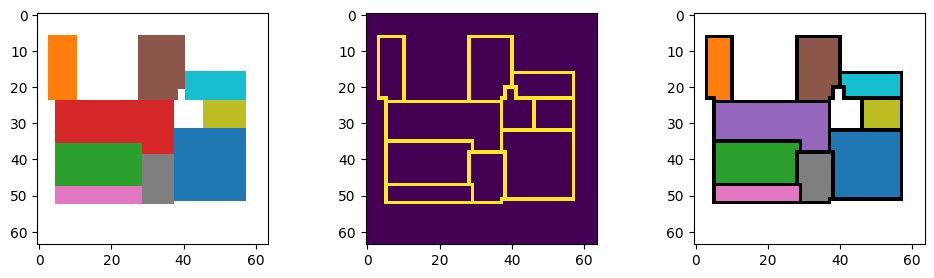

In [26]:
print(torch.all(walls_mask * inner_mask == walls_mask))

plt.figure(figsize=(12,3))

plt.subplot(131)
plt.imshow(rect_mask, cmap=cmapr)

plt.subplot(132)
plt.imshow(walls_mask)

plt.subplot(133)
rooms_with_walls = sum(room.to_mask() * (i + 2) for i, room in enumerate(rooms))
rooms_with_walls[torch.where(walls_mask == 1)] = 1
plt.imshow(rooms_with_walls, cmap=cmapw)